In [11]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torch.nn as nn

In [6]:
# Define input range
x = torch.linspace(-5, 5, 100)

In [7]:
# Activation functions
relu = F.relu(x).detach().numpy()
leaky_relu = F.leaky_relu(x, negative_slope=0.1).detach().numpy()
elu = F.elu(x, alpha=1.0).detach().numpy()
prelu = torch.nn.PReLU()(x).detach().numpy()
gelu = F.gelu(x).detach().numpy()
silu = (x * torch.sigmoid(x)).detach().numpy()  # Sigmoid Linear Unit (SiLU)
sigmoid = torch.sigmoid(x).detach().numpy()
tanh = torch.tanh(x).detach().numpy()
softmax = F.softmax(x, dim=0).detach().numpy()

In [8]:
# Convert x to NumPy for plotting
x_np = x.detach().numpy()

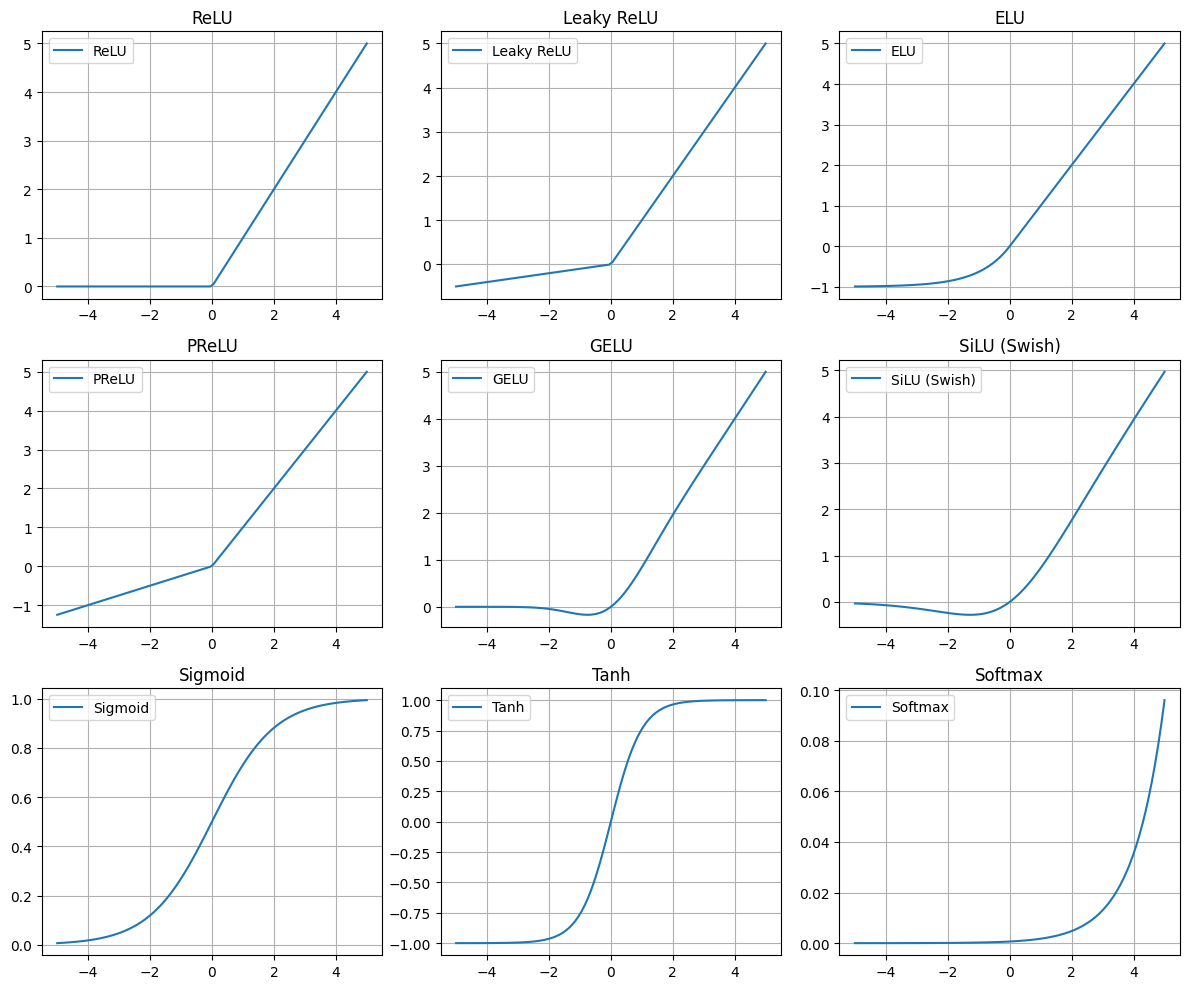

In [9]:
# Plot functions
plt.figure(figsize=(12, 10))

activations = {
    "ReLU": relu,
    "Leaky ReLU": leaky_relu,
    "ELU": elu,
    "PReLU": prelu,
    "GELU": gelu,
    "SiLU (Swish)": silu,
    "Sigmoid": sigmoid,
    "Tanh": tanh,
    "Softmax": softmax,
}

for i, (name, values) in enumerate(activations.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(x_np, values, label=name)
    plt.title(name)
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# 6 xil activation functionlar
activation_functions = {
    "ReLU": F.relu,
    "Leaky ReLU": lambda x: F.leaky_relu(x, negative_slope=0.1),
    "ELU": lambda x: F.elu(x, alpha=1.0),
    "PReLU": nn.PReLU(),
    "GELU": F.gelu,
    "SiLU": F.silu  # Swish yoki Sigmoid Linear Unit (SiLU)
}

In [13]:
# CustomModel sinfi
class CustomModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, activation_func):
        super(CustomModel, self).__init__()
        self.layers = nn.ModuleList()
        self.activations = []

        prev_size = input_size
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(prev_size, hidden_size))
            self.activations.append(activation_func if callable(activation_func) else activation_func.forward)
            prev_size = hidden_size

        self.layers.append(nn.Linear(prev_size, output_size))  # Output layer

    def forward(self, x):
        for layer, activation in zip(self.layers[:-1], self.activations):
            x = activation(layer(x))
        x = self.layers[-1](x)  # Output layerda activation yo‘q
        return x

In [14]:
# Model yaratish funksiyasi
def create_models(input_size=10, hidden_sizes=[32, 16], output_size=2):
    models = []
    for name, activation in activation_functions.items():
        act_func = activation if callable(activation) else activation.forward  # nn.PReLU() uchun
        model = CustomModel(input_size, hidden_sizes, output_size, act_func)
        models.append((name, model))
    return models

# i. 2 ta hidden layer bilan 6 ta model
models_2_layers = create_models(hidden_sizes=[64, 32])

# ii. 3 ta hidden layer bilan 6 ta model
models_3_layers = create_models(hidden_sizes=[128, 64, 32])

# iii. 4 ta hidden layer bilan 6 ta model
models_4_layers = create_models(hidden_sizes=[256, 128, 64, 32])

# iv. 4 ta hidden layer + Sigmoid
sigmoid_model = CustomModel(10, [256, 128, 64, 32], 2, torch.sigmoid)

# v. 4 ta hidden layer + Softmax
softmax_model = CustomModel(10, [256, 128, 64, 32], 2, F.softmax)

# Model nomlarini chiqarish
print("2 Hidden Layers Models:", [name for name, _ in models_2_layers])
print("3 Hidden Layers Models:", [name for name, _ in models_3_layers])
print("4 Hidden Layers Models:", [name for name, _ in models_4_layers])
print("4 Hidden Layers + Sigmoid:", sigmoid_model)
print("4 Hidden Layers + Softmax:", softmax_model)

2 Hidden Layers Models: ['ReLU', 'Leaky ReLU', 'ELU', 'PReLU', 'GELU', 'SiLU']
3 Hidden Layers Models: ['ReLU', 'Leaky ReLU', 'ELU', 'PReLU', 'GELU', 'SiLU']
4 Hidden Layers Models: ['ReLU', 'Leaky ReLU', 'ELU', 'PReLU', 'GELU', 'SiLU']
4 Hidden Layers + Sigmoid: CustomModel(
  (layers): ModuleList(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)
4 Hidden Layers + Softmax: CustomModel(
  (layers): ModuleList(
    (0): Linear(in_features=10, out_features=256, bias=True)
    (1): Linear(in_features=256, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): Linear(in_features=32, out_features=2, bias=True)
  )
)
